In [42]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

C:/Users/MMD/PycharmProjects/Trading/Data Mining/Data/data - Copy\ACE.csv
C:/Users/MMD/PycharmProjects/Trading/Data Mining/Data/data - Copy\ALGN.csv
C:/Users/MMD/PycharmProjects/Trading/Data Mining/Data/data - Copy\ALK.csv
C:/Users/MMD/PycharmProjects/Trading/Data Mining/Data/data - Copy\AMD.csv
C:/Users/MMD/PycharmProjects/Trading/Data Mining/Data/data - Copy\ANDV.csv
C:/Users/MMD/PycharmProjects/Trading/Data Mining/Data/data - Copy\ANF.csv
C:/Users/MMD/PycharmProjects/Trading/Data Mining/Data/data - Copy\ANSS.csv
strategy notify_timer with tid 0, when 2000-02-11 00:00:00 _getminperstatus 199
strategy notify_timer with tid 0, when 2000-03-01 00:00:00 _getminperstatus 187
strategy notify_timer with tid 0, when 2000-04-03 00:00:00 _getminperstatus 164
strategy notify_timer with tid 0, when 2000-05-01 00:00:00 _getminperstatus 145
strategy notify_timer with tid 0, when 2000-06-01 00:00:00 _getminperstatus 123
strategy notify_timer with tid 0, when 2000-07-03 00:00:00 _getminperstatus 101

strategy notify_timer with tid 0, when 2008-04-01 00:00:00 _getminperstatus 31
strategy notify_timer with tid 0, when 2008-05-01 00:00:00 _getminperstatus 31
strategy notify_timer with tid 0, when 2008-06-02 00:00:00 _getminperstatus 31
strategy notify_timer with tid 0, when 2008-07-01 00:00:00 _getminperstatus 31
strategy notify_timer with tid 0, when 2008-08-01 00:00:00 _getminperstatus 31
strategy notify_timer with tid 0, when 2008-09-02 00:00:00 _getminperstatus 31
strategy notify_timer with tid 0, when 2008-10-01 00:00:00 _getminperstatus 31
strategy notify_timer with tid 0, when 2008-11-03 00:00:00 _getminperstatus 31
strategy notify_timer with tid 0, when 2008-12-01 00:00:00 _getminperstatus 31
strategy notify_timer with tid 0, when 2009-01-02 00:00:00 _getminperstatus 31
strategy notify_timer with tid 0, when 2009-02-02 00:00:00 _getminperstatus 31
strategy notify_timer with tid 0, when 2009-03-02 00:00:00 _getminperstatus 31
strategy notify_timer with tid 0, when 2009-04-01 00

strategy notify_timer with tid 0, when 2017-09-01 00:00:00 _getminperstatus 29
strategy notify_timer with tid 0, when 2017-10-02 00:00:00 _getminperstatus 9
strategy notify_timer with tid 0, when 2017-11-01 00:00:00 _getminperstatus -13
2017-10-31 Enter ANSS - Rank 381.55
2017-10-31 Enter ALGN - Rank 111.90
2017-10-31 Enter ANDV - Rank 42.54
strategy notify_timer with tid 0, when 2017-12-01 00:00:00 _getminperstatus -33
2017-11-30 Leave ANDV - Rank 3.54
2017-11-30 Rebal ALGN - Rank 342.50
2017-11-30 Rebal ANSS - Rank 161.41
2017-11-30 Enter ANF - Rank 12.86
strategy notify_timer with tid 0, when 2018-01-02 00:00:00 _getminperstatus -53
2017-12-29 Leave ALGN - Rank 6.34
2017-12-29 Leave ANF - Rank 12.86
2017-12-29 Rebal ANSS - Rank 17.96
2017-12-29 Enter ALK - Rank 216.27
2017-12-29 Enter ANDV - Rank 209.17
strategy notify_timer with tid 0, when 2018-02-01 00:00:00 _getminperstatus -74
2018-01-31 Leave ALK - Rank 8.05
2018-01-31 Leave ANDV - Rank 3.20
2018-01-31 Rebal ANSS - Rank 265.25

<IPython.core.display.Javascript object>


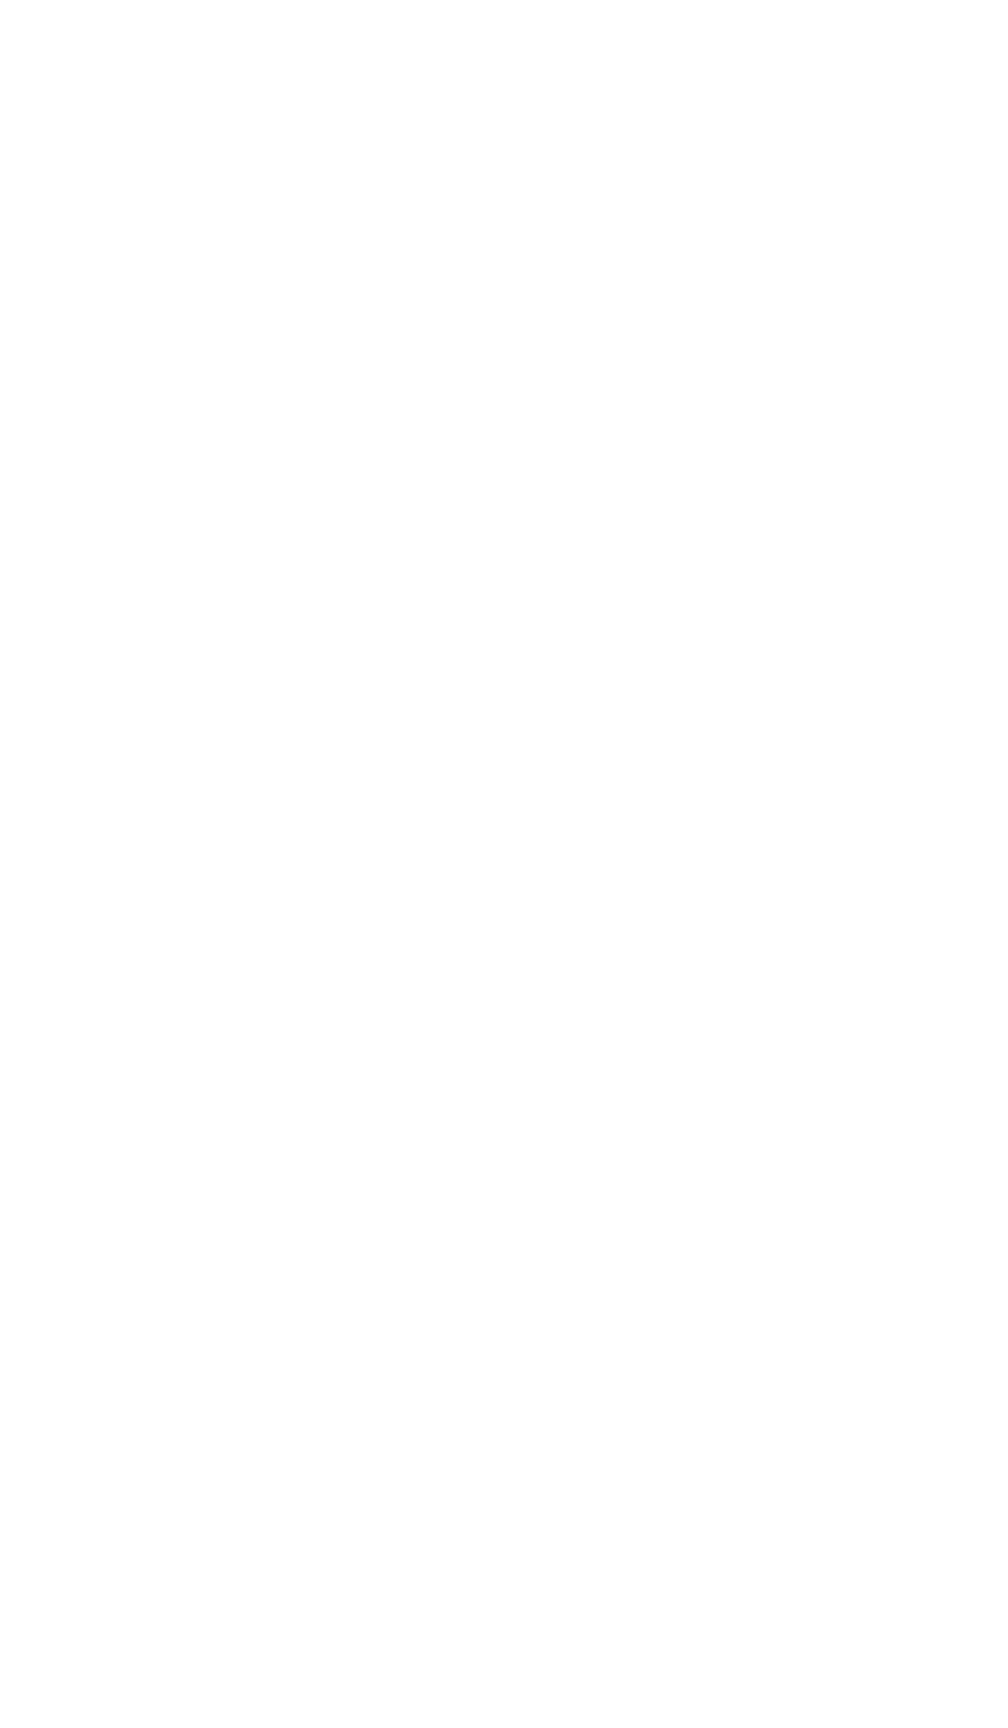

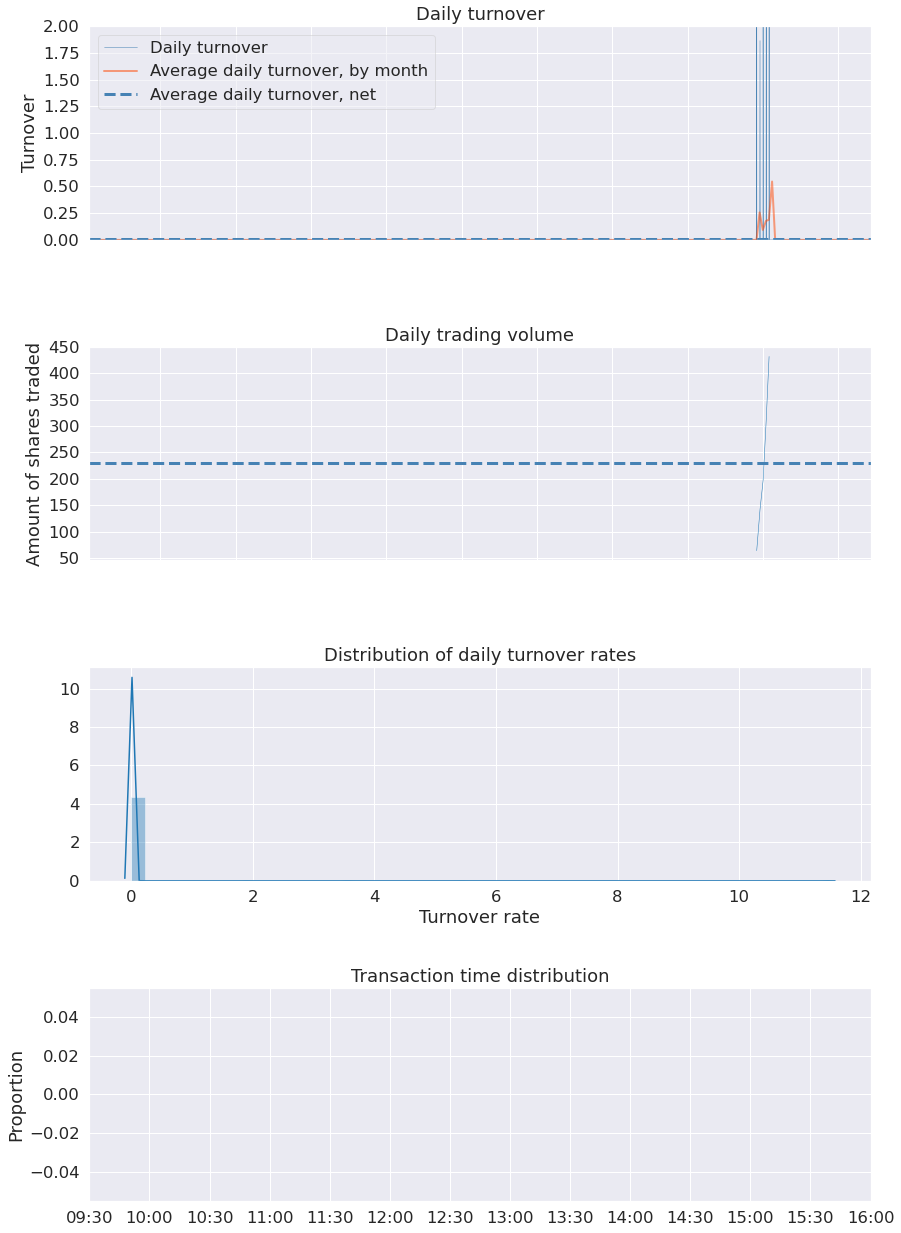

In [59]:
import datetime
import glob
import os.path
import pandas as pd
import backtrader as bt
import backtrader.analyzers as btanal
import pyfolio as pf
import numpy as np
from scipy.stats import linregress
import warnings 
warnings.filterwarnings('ignore')

globalparams = dict(cash=10000,            
                    commission=0.005           
                    )

def momentum_func(self, the_array):
    r = np.log(the_array)
    slope, _, rvalue, _, _ = linregress(np.arange(len(r)), r)
    annualized = (1 + slope) ** 252
    return annualized * (rvalue ** 2)

class Momentum(bt.ind.OperationN):
    lines = ('trend',)
    #params = dict(period=50)
    func = momentum_func
    
def printTradeAnalysis(analyzer):
    '''
    Function to print the Technical Analysis results in a nice format.
    '''
    #Get the results we are interested in
    total_open = analyzer.total.open
    total_closed = analyzer.total.closed
    total_won = analyzer.won.total
    total_lost = analyzer.lost.total
    win_streak = analyzer.streak.won.longest
    lose_streak = analyzer.streak.lost.longest
    pnl_net = round(analyzer.pnl.net.total,2)
    strike_rate = (total_won / total_closed) * 100
    #Designate the rows
    h1 = ['Total Open', 'Total Closed', 'Total Won', 'Total Lost']
    h2 = ['Strike Rate','Win Streak', 'Losing Streak', 'PnL Net with closed trades']
    r1 = [total_open, total_closed, total_won, total_lost]
    r2 = [strike_rate, win_streak, lose_streak, pnl_net]
    #Check which set of headers is the longest.
    if len(h1) > len(h2):
        header_length = len(h1)
    else:
        header_length = len(h2)
    #Print the rows
    print_list = [h1,r1,h2,r2]
    row_format ="{:<15}" * (header_length + 1)
    print("Trade Analysis Results:")
    for row in print_list:
        print(row_format.format('',*row))

   
class St(bt.Strategy):
    params = dict(
        selcperc=0.50,  # percentage of stocks to select from the universe
        rperiod=1,  # period for the returns calculation, default 1 period
        vperiod=30,  # lookback period for volatility - default 36 periods
        mperiod=30,  # lookback period for momentum - default 90 periods
        momentum=Momentum, # parametrize the momentum and its period
        reserve=0.05,  # 5% reserve capital
        monthdays=[1],
        monthcarry=True,
        when=bt.timer.SESSION_START,
        benchmarkstop=True, #If true, no stocks will be bought and no rebalancing will be done if benchmark is below SMAperiod
        SMAperiod=200
    )

    def log(self, arg):
        print('{} {}'.format(self.datetime.date(), arg))

    def __init__(self):
        self.bench = self.data0
        self.stocks = self.datas[1:]
        # calculate 1st the amount of stocks that will be selected
        self.selnum = int(len(self.stocks) * self.p.selcperc)

        # allocation perc per stock
        # reserve kept to make sure orders are not rejected due to
        # margin. Prices are calculated when known (close), but orders can only
        # be executed next day (opening price). Price can gap upwards
        self.perctarget = (1.0 - self.p.reserve) / self.selnum

        self.add_timer(
            when=self.p.when,
            monthdays=self.p.monthdays,
            monthcarry=self.p.monthcarry
        )

        # returns, volatilities and momentums
        rs = [bt.ind.PctChange(d, period=self.p.rperiod) for d in self.stocks]
        vs = [bt.ind.StdDev(ret, period=self.p.vperiod) for ret in rs]
        #ms = [bt.ind.ROC(d, period=self.p.mperiod) for d in self.datas]
        ms = [self.p.momentum(d, period=self.p.mperiod) for d in self.stocks]
        
        self.bench_sma = bt.ind.SMA(self.data0, period=self.p.SMAperiod)
        
        # simple rank formula: (momentum * net payout) / volatility
        # the highest ranked: low vol, large momentum, large payout
        self.ranks = {d: m / v for d, v, m in zip(self.stocks, vs, ms)}
        #TODO: does it perform better without the volatility?

        self.bench_filter = self.bench < self.bench_sma
        
    def prenext(self):
        # call next() even when data is not available for all tickers
        self.next()     

    def notify_timer(self, timer, when, *args, **kwargs):
        #print('strategy notify_timer with tid {}, when {} _getminperstatus {}'.
        #      format(timer.p.tid, when, int(self._getminperstatus())))
        if self._getminperstatus() < 0:
            
            self.rebalance()

    def next(self):
        pass
    def rebalance(self):

        # sort data and current rank
        ranks = sorted(
            self.ranks.items(),  # get the (d, rank), pair
            key=lambda x: x[1][0],  # use rank (elem 1) and current time "0"
            reverse=True,  # highest ranked 1st ... please
        )
        
        # put top ranked in dict with data as key to test for presence
        rtop = dict(ranks[:self.selnum])

        # For logging purposes of stocks leaving the portfolio
        rbot = dict(ranks[self.selnum:])

        # prepare quick lookup list of stocks currently holding a position
        posdata = [d for d, pos in self.getpositions().items() if pos]

        # remove those no longer top ranked
        # do this first to issue sell orders and free cash
        for d in (d for d in posdata if d not in rtop):
            self.log('Leave {} - Rank {:.2f}'.format(d._name, rbot[d][0]))
            self.order_target_percent(d, target=0.0)
        
        if self.p.benchmarkstop:
            if self.bench_filter:
                print('SMA {} - Bench {}'.format(self.bench_sma[0], self.bench[0]))
                return #stops here
        
        # rebalance those already top ranked and still there
        for d in (d for d in posdata if d in rtop):
            self.log('Rebal {} - Rank {:.2f}'.format(d._name, rtop[d][0]))
            self.order_target_percent(d, target=self.perctarget)
            del rtop[d]  # remove it, to simplify next iteration

        # issue a target order for the newly top ranked stocks
        # do this last, as this will generate buy orders consuming cash
        for d in rtop:
            self.log('Enter {} - Rank {:.2f}'.format(d._name, rtop[d][0]))
            self.order_target_percent(d, target=self.perctarget)


def run(args=None):
    cerebro = bt.Cerebro()


    # Parse from/to-date
    fromdate = datetime.datetime(2013, 3, 1)
    todate = datetime.datetime(2018, 6, 18)
    
    # Add SPY/QQQ as "Benchmark"
    df0 = pd.read_csv(r'C:\Users\MMD\PycharmProjects\Trading\Data Mining\Data\SPY.csv', index_col=0, parse_dates=True)
    benchdata = bt.feeds.PandasData(dataname=df0,name="SPY", plot=False)
    cerebro.adddata(benchdata)
                    
    # add all the data files available in the directory datadir
    for fname in glob.glob(os.path.join(r'C:/Users/MMD/PycharmProjects/Trading/Data Mining/Data/data - Copy', '*')):
        df = pd.read_csv(fname, index_col=0, parse_dates=True)

        if len(df)>100:
            cerebro.adddata(bt.feeds.PandasData(dataname=df,name=os.path.basename(fname).replace(".csv", ""), plot=False))
            print(fname)
            
    # add strategy
    cerebro.addstrategy(St)

    # set the cash
    cerebro.broker.setcash(globalparams["cash"])
    cerebro.broker.set_coc(True)
    cerebro.broker.setcommission(commission=globalparams["commission"])
    
    #Analysers
    '''
    cerebro.addanalyzer(btanal.SharpeRatio, riskfreerate=0.0)
    cerebro.addanalyzer(btanal.Returns)
    cerebro.addanalyzer(btanal.DrawDown)
    '''
    cerebro.addanalyzer(btanal.PyFolio)                # Needed to use PyFolio
    cerebro.addanalyzer(btanal.TradeAnalyzer)          # Analyzes individual trades
 
    cerebro.addobserver(bt.observers.Benchmark,
                        data=benchdata,
                        timeframe=bt.TimeFrame.NoTimeFrame)
    
    results = cerebro.run(stdstats=True, tradehistory=True)
    #cerebro.plot()
    '''
    print(f"Sharpe: {results[0].analyzers.sharperatio.get_analysis()['sharperatio']:.3f}")
    print(f"Norm. Annual Return: {results[0].analyzers.returns.get_analysis()['rnorm100']:.2f}%")
    print(f"Max Drawdown: {results[0].analyzers.drawdown.get_analysis()['max']['drawdown']:.2f}%")
    '''
    
    # Basic performance evaluation ... final value ... minus starting cash
    pnl = cerebro.broker.get_value() - globalparams["cash"]
    print('Profit ... or Loss: {:.2f}'.format(pnl))
    
    printTradeAnalysis(results[0].analyzers.tradeanalyzer.get_analysis())
    
    returns, positions, transactions, gross_lev = results[0].analyzers.pyfolio.get_pf_items()
    benchmark_rets = pd.Series([0.00004] * len(returns.index), index=returns.index)     
    #pf.create_full_tear_sheet(returns, positions, transactions, benchmark_rets=benchmark_rets)
    
if __name__ == '__main__':
    run()